In [10]:
from jupytertools import *
display_toggle_code_button()

toggle_code()

Toggle input

# Bayes Theorem

## $P(H\mid E) = \frac{P(E \mid H) \cdot P(H)}{P(E)} = \frac{P(E \mid H) \cdot P(H)} {P(H) \cdot P(E \mid H)\: + \:P(\lnot H) \cdot P(E \mid \lnot H)}$

A disease affects $0.1 \%$ of the population. The test has an accuracy of $99 \%$ meaning that it will correctly identify the people who have the disease in $99 \%$ of cases
and only incorrectly give a false positive in $1 \%$ of cases.

What are the chances that you actually have the disease if you test positive?

The event $E$ is the test giving a positive result. The hypthesis $H$ is that you actually have the disease.
The prior probability $P(H)$ is the chance that the hypthesis is true before you were given the test results,
which is $0.001$ in our example.
The probability that you get a positive test result if you have the disease, is $P(E \mid H)$, which is $0.99$ here.
The total probability of the event occurring is $P(E)$, which is the sum of the probability of having the disease and being tested positive plus the probability of not
having the disease and being falsely identified: $P(H) \cdot P(E \mid H)\: + \:P(\lnot H) \cdot P(E \mid \lnot H)$

The probability that the hypthesis is true, in the event of a positive test result, is $P(H \mid E)$, which is what we
want to know.

Putting in the numbers gives
## $P(H \mid E) = \frac{0.99 \cdot 0.001}{0.001 \cdot 0.99 + 0.999 \cdot 0.01} \approx 9 \%$

Now what if we get a second positive test independently from another lab?

In this case we'd have to put the $9 \%$ in as the new prior probability.
The new result would then be $\approx 91 \%$


<ipython-input-11-a9aa5e5aa23e>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list("*1 2 3 4 5"))
<ipython-input-11-a9aa5e5aa23e>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{2*y}0%" for y in range(6)])


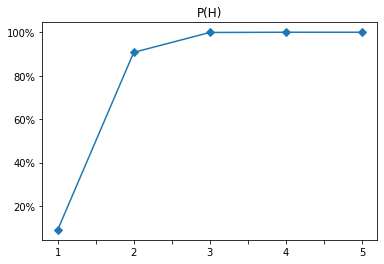

In [11]:
# P_H = 0.001dfcb

def bayes(_P_H=0.001, _P_E_given_H=0.99):
    P_not_H = 1 - _P_H
    P_E_not_given_H = 1 - _P_E_given_H
    P_E = _P_H * _P_E_given_H + P_not_H * P_E_not_given_H
    _P = (_P_E_given_H * _P_H) / P_E
    return _P

import numpy as np
import sympy
from sympy.abc import x, y, theta, phi, alpha
from matplotlib import pyplot as plt

data = []
P_H = 0.001
P_E_given_H = 0.99
N = 5

for i in range(N):
    P = bayes(P_H, P_E_given_H)
    data.append((i, P))
    P_H = P

x = np.linspace(0, N - 1, N)
y = [y for x, y in data]

fig, ax1 = plt.subplots()
ax1.set_title("P(H)")
ax1.set_xticklabels(list("*1 2 3 4 5"))
ax1.set_yticklabels([f"{2*y}0%" for y in range(6)])

plt.plot(x, y, 'D-')
plt.show()

show([y*100 for x,y in data])